## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
#Compile 模型
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 30s 600us/step - loss: 2.2883 - accuracy: 0.1557 - val_loss: 2.2283 - val_accuracy: 0.1973
Epoch 2/500
50000/50000 [==============================] - 17s 342us/step - loss: 2.1965 - accuracy: 0.2215 - val_loss: 2.1649 - val_accuracy: 0.2443
Epoch 3/500
50000/50000 [==============================] - 16s 321us/step - loss: 2.1380 - accuracy: 0.2591 - val_loss: 2.1127 - val_accuracy: 0.2734
Epoch 4/500
50000/50000 [==============================] - 15s 297us/step - loss: 2.0897 - accuracy: 0.2798 - val_loss: 2.0698 - val_accuracy: 0.2941
Epoch 5/500
50000/50000 [==============================] - 15s 300us/step - loss: 2.0499 - accuracy: 0.2935 - val_loss: 2.0341 - val_accuracy: 0.2984
Epoch 6/500
50000/50000 [==============================] - 15s 303us/step - loss: 2.0164 - accuracy: 0.3025 - val_loss: 2.0035 - val_accuracy: 0.3024
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 16s 324us/step - loss: 1.6564 - accuracy: 0.4224 - val_loss: 1.6633 - val_accuracy: 0.4136
Epoch 56/500
50000/50000 [==============================] - 15s 296us/step - loss: 1.6533 - accuracy: 0.4230 - val_loss: 1.6580 - val_accuracy: 0.4159
Epoch 57/500
50000/50000 [==============================] - 17s 334us/step - loss: 1.6502 - accuracy: 0.4243 - val_loss: 1.6545 - val_accuracy: 0.4202
Epoch 58/500
50000/50000 [==============================] - 18s 366us/step - loss: 1.6471 - accuracy: 0.4252 - val_loss: 1.6528 - val_accuracy: 0.4170
Epoch 59/500
50000/50000 [==============================] - 20s 404us/step - loss: 1.6442 - accuracy: 0.4274 - val_loss: 1.6498 - val_accuracy: 0.4167
Epoch 60/500
50000/50000 [==============================] - 15s 304us/step - loss: 1.6410 - accuracy: 0.4276 - val_loss: 1.6495 - val_accuracy: 0.4173
Epoch 61/500
50000/50000 [==============================] - 15s 297us/step - loss: 1.6380 - ac

50000/50000 [==============================] - 14s 276us/step - loss: 1.5245 - accuracy: 0.4684 - val_loss: 1.5491 - val_accuracy: 0.4519
Epoch 110/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.5227 - accuracy: 0.4693 - val_loss: 1.5478 - val_accuracy: 0.4548
Epoch 111/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.5208 - accuracy: 0.4691 - val_loss: 1.5531 - val_accuracy: 0.4553
Epoch 112/500
50000/50000 [==============================] - 17s 330us/step - loss: 1.5190 - accuracy: 0.4700 - val_loss: 1.5450 - val_accuracy: 0.4542
Epoch 113/500
50000/50000 [==============================] - 21s 416us/step - loss: 1.5171 - accuracy: 0.4718 - val_loss: 1.5436 - val_accuracy: 0.4558
Epoch 114/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.5150 - accuracy: 0.4718 - val_loss: 1.5407 - val_accuracy: 0.4554
Epoch 115/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.5133 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.4326 - accuracy: 0.5016 - val_loss: 1.4790 - val_accuracy: 0.4756
Epoch 164/500
50000/50000 [==============================] - 14s 276us/step - loss: 1.4309 - accuracy: 0.5013 - val_loss: 1.4786 - val_accuracy: 0.4831
Epoch 165/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.4292 - accuracy: 0.5020 - val_loss: 1.4832 - val_accuracy: 0.4812
Epoch 166/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.4280 - accuracy: 0.5033 - val_loss: 1.4738 - val_accuracy: 0.4773
Epoch 167/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.4262 - accuracy: 0.5031 - val_loss: 1.4820 - val_accuracy: 0.4779
Epoch 168/500
50000/50000 [==============================] - 14s 270us/step - loss: 1.4247 - accuracy: 0.5041 - val_loss: 1.4747 - val_accuracy: 0.4828
Epoch 169/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.42

Epoch 217/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.3524 - accuracy: 0.5282 - val_loss: 1.4273 - val_accuracy: 0.4957
Epoch 218/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.3509 - accuracy: 0.5283 - val_loss: 1.4283 - val_accuracy: 0.4932
Epoch 219/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.3498 - accuracy: 0.5294 - val_loss: 1.4236 - val_accuracy: 0.4976
Epoch 220/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.3477 - accuracy: 0.5304 - val_loss: 1.4227 - val_accuracy: 0.4972
Epoch 221/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.3471 - accuracy: 0.5304 - val_loss: 1.4204 - val_accuracy: 0.4946
Epoch 222/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.3454 - accuracy: 0.5294 - val_loss: 1.4232 - val_accuracy: 0.4976
Epoch 223/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.34

Epoch 271/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.2812 - accuracy: 0.5518 - val_loss: 1.3949 - val_accuracy: 0.5030
Epoch 272/500
50000/50000 [==============================] - 22s 443us/step - loss: 1.2802 - accuracy: 0.5532 - val_loss: 1.4055 - val_accuracy: 0.4992
Epoch 273/500
50000/50000 [==============================] - 18s 355us/step - loss: 1.2795 - accuracy: 0.5531 - val_loss: 1.3963 - val_accuracy: 0.5010
Epoch 274/500
50000/50000 [==============================] - 15s 309us/step - loss: 1.2790 - accuracy: 0.5530 - val_loss: 1.4015 - val_accuracy: 0.4992
Epoch 275/500
50000/50000 [==============================] - 21s 429us/step - loss: 1.2770 - accuracy: 0.5544 - val_loss: 1.3826 - val_accuracy: 0.5114
Epoch 276/500
50000/50000 [==============================] - 17s 335us/step - loss: 1.2758 - accuracy: 0.5546 - val_loss: 1.3874 - val_accuracy: 0.5103
Epoch 277/500
50000/50000 [==============================] - 16s 315us/step - loss: 1.27

Epoch 325/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.2192 - accuracy: 0.5723 - val_loss: 1.3670 - val_accuracy: 0.5138
Epoch 326/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.2174 - accuracy: 0.5752 - val_loss: 1.3865 - val_accuracy: 0.5078
Epoch 327/500
50000/50000 [==============================] - 20s 401us/step - loss: 1.2173 - accuracy: 0.5741 - val_loss: 1.3534 - val_accuracy: 0.5208
Epoch 328/500
50000/50000 [==============================] - 28s 561us/step - loss: 1.2155 - accuracy: 0.5745 - val_loss: 1.3745 - val_accuracy: 0.5141
Epoch 329/500
50000/50000 [==============================] - 21s 429us/step - loss: 1.2142 - accuracy: 0.5755 - val_loss: 1.4097 - val_accuracy: 0.5050
Epoch 330/500
50000/50000 [==============================] - 18s 357us/step - loss: 1.2135 - accuracy: 0.5753 - val_loss: 1.3698 - val_accuracy: 0.5100
Epoch 331/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.21

Epoch 379/500
50000/50000 [==============================] - 19s 379us/step - loss: 1.1602 - accuracy: 0.5936 - val_loss: 1.3473 - val_accuracy: 0.5216
Epoch 380/500
50000/50000 [==============================] - 15s 305us/step - loss: 1.1604 - accuracy: 0.5943 - val_loss: 1.3484 - val_accuracy: 0.5206
Epoch 381/500
50000/50000 [==============================] - 15s 307us/step - loss: 1.1581 - accuracy: 0.5949 - val_loss: 1.3771 - val_accuracy: 0.5117
Epoch 382/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.1577 - accuracy: 0.5949 - val_loss: 1.3631 - val_accuracy: 0.5208
Epoch 383/500
50000/50000 [==============================] - 15s 308us/step - loss: 1.1561 - accuracy: 0.5944 - val_loss: 1.3439 - val_accuracy: 0.5224
Epoch 384/500
50000/50000 [==============================] - 16s 325us/step - loss: 1.1562 - accuracy: 0.5946 - val_loss: 1.3573 - val_accuracy: 0.5197
Epoch 385/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.15

50000/50000 [==============================] - 14s 275us/step - loss: 1.1056 - accuracy: 0.6148 - val_loss: 1.3326 - val_accuracy: 0.5257
Epoch 433/500
50000/50000 [==============================] - 14s 277us/step - loss: 1.1022 - accuracy: 0.6160 - val_loss: 1.3309 - val_accuracy: 0.5279
Epoch 434/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.1041 - accuracy: 0.6145 - val_loss: 1.3922 - val_accuracy: 0.5004
Epoch 435/500
50000/50000 [==============================] - 16s 328us/step - loss: 1.1036 - accuracy: 0.6146 - val_loss: 1.3264 - val_accuracy: 0.5279
Epoch 436/500
50000/50000 [==============================] - 15s 303us/step - loss: 1.1010 - accuracy: 0.6154 - val_loss: 1.3618 - val_accuracy: 0.5173
Epoch 437/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.1017 - accuracy: 0.6136 - val_loss: 1.3568 - val_accuracy: 0.5164
Epoch 438/500
50000/50000 [==============================] - 17s 335us/step - loss: 1.1002 - accuracy:

Epoch 486/500
50000/50000 [==============================] - 15s 309us/step - loss: 1.0515 - accuracy: 0.6321 - val_loss: 1.3171 - val_accuracy: 0.5344
Epoch 487/500
50000/50000 [==============================] - 18s 353us/step - loss: 1.0494 - accuracy: 0.6334 - val_loss: 1.3359 - val_accuracy: 0.5247
Epoch 488/500
50000/50000 [==============================] - 17s 342us/step - loss: 1.0476 - accuracy: 0.6353 - val_loss: 1.3444 - val_accuracy: 0.5229
Epoch 489/500
50000/50000 [==============================] - 17s 335us/step - loss: 1.0467 - accuracy: 0.6344 - val_loss: 1.3554 - val_accuracy: 0.5218
Epoch 490/500
50000/50000 [==============================] - 15s 306us/step - loss: 1.0486 - accuracy: 0.6345 - val_loss: 1.3509 - val_accuracy: 0.5187
Epoch 491/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.0484 - accuracy: 0.6357 - val_loss: 1.5165 - val_accuracy: 0.4810
Epoch 492/500
50000/50000 [==============================] - 17s 350us/step - loss: 1.04

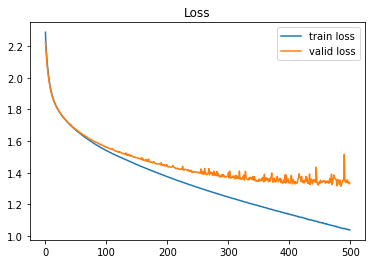

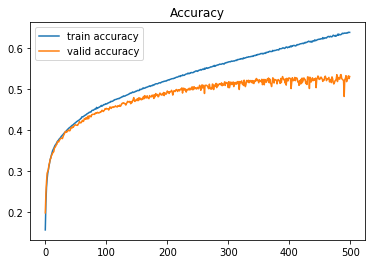

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()